In [56]:
#upload necessary library files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
data=pd.read_excel("/content/Niramay_Project.xlsx")  #upload dataset

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:223: UserWarning: Cell E2163 is marked as a date but the serial value 6692858 is outside the limits for dates. The cell will be treated as an error.
  warn(msg)
/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:223: UserWarning: Cell E10979 is marked as a date but the serial value 6685564 is outside the limits for dates. The cell will be treated as an error.
  warn(msg)
/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:223: UserWarning: Cell E19645 is marked as a date but the serial value 6685564 is outside the limits for dates. The cell will be treated as an error.
  warn(msg)


In [58]:
#Checking sample top 10 rows
data.head(10)


,Unnamed: 0,Sr No,Inbound/Outbound,EMPLOYEE NAME,Date of calling,Name of counsellor,Call comments,Sleep,Unnamed: 8,Calm,Cheerful,active,interest things,Total score,Issues discussed
0,Navi Mumbai,101,Outbound,Arun Bhimrao Jaunjal,2024-05-15 00:00:00,Rutuja,"call after 2pm, call not answered",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Navi Mumbai,102,Outbound,ARUN BHIMRAO JADHAV,2024-05-15 00:00:00,Rutuja,Not Answered,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Navi Mumbai,103,Outbound,ARUN BHAGWAN JADHAV,2024-05-15 00:00:00,Rutuja,Not Answered,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Navi Mumbai,104,Outbound,Alka Bhiku Karade,2024-06-03 00:00:00,Suma,wellness check done informed about the helpline,3,NaN,4,5,4,5,21,NaN
4,Navi Mumbai,105,Outbound,Ashok Baburao Khaire,2024-05-15 00:00:00,Rutuja,"call later again , inbound wellness check done...",5,NaN,5,5,5,5,25,NaN
5,Navi Mumbai,106,Outbound,Ashok Baban Kachare,2024-05-15 00:00:00,Rutuja,"Call later , caller is busy at the moment",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Navi Mumbai,107,Outbound,Anand Balu Kharat,2024-05-15 00:00:00,Rutuja,talked about his concerns and stress managemen...,NaN,NaN,NaN,NaN,NaN,NaN,2,"sleep disturabance, hectic schedule"
7,Navi Mumbai,108,Outbound,ANANDA BHIKOBA KARE,2024-05-15 00:00:00,Rutuja,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Navi Mumbai,109,Outbound,Anita Baban Mahale,2024-05-15 00:00:00,Rutuja,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Navi Mumbai,110,Outbound,Anil Balaji Mundhe,2024-06-01 00:00:00,Dhanali Joshi,wellness check done informed about the helpline,4,NaN,3,5,5,1,18,NaN


In [59]:
# Data having 20,541 rows and 15 columns
data.shape

(20541, 15)

In [60]:
# Cheking for Missing Data
data.isnull().sum()
#Dataset contain lot of null values

,0
Unnamed: 0,6588
Sr No,6577
Inbound/Outbound,6463
EMPLOYEE NAME,28
Date of calling,4936
Name of counsellor,4981
Call comments,8908
Sleep,15560
Unnamed: 8,20529
Calm,15685


In [61]:
data.info()
#We just check from here how many are non-null values contain each coloums

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20541 entries, 0 to 20540
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          13953 non-null  object 
 1   Sr No               13964 non-null  object 
 2   Inbound/Outbound    14078 non-null  object 
 3   EMPLOYEE NAME       20513 non-null  object 
 4   Date of calling     15605 non-null  object 
 5   Name of counsellor  15560 non-null  object 
 6   Call comments       11633 non-null  object 
 7   Sleep               4981 non-null   object 
 8   Unnamed: 8          12 non-null     float64
 9   Calm                4856 non-null   object 
 10  Cheerful            4850 non-null   object 
 11  active              4840 non-null   object 
 12  interest things     4831 non-null   object 
 13  Total score         13589 non-null  object 
 14  Issues discussed    739 non-null    object 
dtypes: float64(1), object(14)
memory usage: 2.4+ MB


In [62]:
# Replacing column name as Unnamed: 0  to Region for better understanding
data.rename(columns={'Unnamed: 0':'Region'},inplace=True)
data.head()

,Region,Sr No,Inbound/Outbound,EMPLOYEE NAME,Date of calling,Name of counsellor,Call comments,Sleep,Unnamed: 8,Calm,Cheerful,active,interest things,Total score,Issues discussed
0,Navi Mumbai,101,Outbound,Arun Bhimrao Jaunjal,2024-05-15 00:00:00,Rutuja,"call after 2pm, call not answered",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Navi Mumbai,102,Outbound,ARUN BHIMRAO JADHAV,2024-05-15 00:00:00,Rutuja,Not Answered,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Navi Mumbai,103,Outbound,ARUN BHAGWAN JADHAV,2024-05-15 00:00:00,Rutuja,Not Answered,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Navi Mumbai,104,Outbound,Alka Bhiku Karade,2024-06-03 00:00:00,Suma,wellness check done informed about the helpline,3,NaN,4,5,4,5,21,NaN
4,Navi Mumbai,105,Outbound,Ashok Baburao Khaire,2024-05-15 00:00:00,Rutuja,"call later again , inbound wellness check done...",5,NaN,5,5,5,5,25,NaN


In [63]:
#Checking for duplicates row in data set
data[data.duplicated()].shape
#Containing 25 rows as duplicated


(25, 15)

In [64]:
#Drop duplicated values
data_cleaned = data.drop_duplicates()

In [65]:
#Checking again duplicates
data_cleaned.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
20536,False
20537,False
20538,False
20539,False


In [66]:
data_cleaned[data_cleaned.duplicated()].shape
# Now all duplicates are removed from dataset

(0, 15)

In [67]:
#Drop Unnamed: 8 column due to containing null values
data_cleaned = data.drop(columns=['Unnamed: 8'])


In [68]:
data_cleaned.head(2)

,Region,Sr No,Inbound/Outbound,EMPLOYEE NAME,Date of calling,Name of counsellor,Call comments,Sleep,Calm,Cheerful,active,interest things,Total score,Issues discussed
0,Navi Mumbai,101,Outbound,Arun Bhimrao Jaunjal,2024-05-15 00:00:00,Rutuja,"call after 2pm, call not answered",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Navi Mumbai,102,Outbound,ARUN BHIMRAO JADHAV,2024-05-15 00:00:00,Rutuja,Not Answered,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
# Drop rows where all wellness metrics are missing (Sleep, Calm, Cheerful active interest, Total score)
# Try to drop NaN values from numeric dataset.
data_cleaned = data_cleaned.dropna(subset=['Sleep', 'Calm', 'Cheerful','active','interest things','Total score'], how='all')


In [70]:
data_cleaned.isnull().sum()
# Still containing null values

,0
Region,5452
Sr No,5453
Inbound/Outbound,5396
EMPLOYEE NAME,2
Date of calling,2373
Name of counsellor,2398
Call comments,5072
Sleep,8714
Calm,8839
Cheerful,8845


In [71]:
# Now replace all NaN values to mode values
data_cleaned = data_cleaned.apply(lambda x: x.fillna(x.mode()[0]))

In [72]:
data_cleaned.isnull().sum()
# Now all  NaN values treated by mode.

,0
Region,0
Sr No,0
Inbound/Outbound,0
EMPLOYEE NAME,0
Date of calling,0
Name of counsellor,0
Call comments,0
Sleep,0
Calm,0
Cheerful,0


In [73]:
data_cleaned.head(10)
#Checking for sample data

,Region,Sr No,Inbound/Outbound,EMPLOYEE NAME,Date of calling,Name of counsellor,Call comments,Sleep,Calm,Cheerful,active,interest things,Total score,Issues discussed
3,Navi Mumbai,104,Outbound,Alka Bhiku Karade,2024-06-03 00:00:00,Suma,wellness check done informed about the helpline,3,4,5,4,5,21,-
4,Navi Mumbai,105,Outbound,Ashok Baburao Khaire,2024-05-15 00:00:00,Rutuja,"call later again , inbound wellness check done...",5,5,5,5,5,25,-
6,Navi Mumbai,107,Outbound,Anand Balu Kharat,2024-05-15 00:00:00,Rutuja,talked about his concerns and stress managemen...,5,5,5,5,5,2,"sleep disturabance, hectic schedule"
9,Navi Mumbai,110,Outbound,Anil Balaji Mundhe,2024-06-01 00:00:00,Dhanali Joshi,wellness check done informed about the helpline,4,3,5,5,1,18,-
12,Navi Mumbai,113,Outbound,Anis Bashir Manyar,2024-05-15 00:00:00,Rutuja,talked on overthinking and mindfulness,5,5,5,5,5,10,"overthinking ,stress"
13,Navi Mumbai,114,Outbound,Ashok Baban Margal,2024-05-15 00:00:00,Rutuja,lack of intrest in hobbies and work pressure,5,5,5,5,5,8,Work pressure
14,Navi Mumbai,115,Outbound,ANKUSH BALU NIMBEKAR,2024-04-15 00:00:00,Rutuja,Call made but got disconnected in middle - wel...,4,5,5,5,4,23,-
15,Navi Mumbai,116,Outbound,AKASH BALASAHEB NALAVADE,2024-05-15 00:00:00,Rutuja,sleep hygieneand stress management,5,5,5,5,5,19,sleep concerns
17,Nagpur,Outbound,Inbound,Archana Balkrishana Patil,2024-06-04 00:00:00,Rutika Khadamkar,"call made, recipient did not answer call",3,4,4,5,4,20,-
20,Navi Mumbai,120,Inbound,AUDUMBAR BHALCHANDRA PATIL,2024-06-02 00:00:00,Renuka,New call. Given information about police helpl...,5,5,5,5,5,25,-


In [74]:
# Fix date and time in date of calling column

data_cleaned['Date of calling'] = pd.to_datetime(data_cleaned['Date of calling'],errors='coerce')

In [75]:
data_cleaned['Sleep'] = pd.to_numeric(data_cleaned['Sleep'], errors='coerce')
data_cleaned = data_cleaned.dropna(subset=['Sleep'])
#This line converts the 'Sleep' column in the DataFrame 'data_cleaned' to numeric values.

In [76]:
data_cleaned

,Region,Sr No,Inbound/Outbound,EMPLOYEE NAME,Date of calling,Name of counsellor,Call comments,Sleep,Calm,Cheerful,active,interest things,Total score,Issues discussed
3,Navi Mumbai,104,Outbound,Alka Bhiku Karade,2024-06-03,Suma,wellness check done informed about the helpline,3.0,4,5,4,5,21,-
4,Navi Mumbai,105,Outbound,Ashok Baburao Khaire,2024-05-15,Rutuja,"call later again , inbound wellness check done...",5.0,5,5,5,5,25,-
6,Navi Mumbai,107,Outbound,Anand Balu Kharat,2024-05-15,Rutuja,talked about his concerns and stress managemen...,5.0,5,5,5,5,2,"sleep disturabance, hectic schedule"
9,Navi Mumbai,110,Outbound,Anil Balaji Mundhe,2024-06-01,Dhanali Joshi,wellness check done informed about the helpline,4.0,3,5,5,1,18,-
12,Navi Mumbai,113,Outbound,Anis Bashir Manyar,2024-05-15,Rutuja,talked on overthinking and mindfulness,5.0,5,5,5,5,10,"overthinking ,stress"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20524,Nagpur,Outbound,Outbound,Shweta Nagehdra Upadhyay,2024-06-24,Archana Gatkine,Call received but need follow up of MH for som...,3.0,3,3,3,3,15,-
20534,Nagpur,Outbound,Outbound,SANJAY ONKARNATH MISHRA,2024-06-14,Avantika,Call received and brief counselling done. Poli...,2.0,3,1,2,2,10,2016 - He got Guillain-Barré syndrome ( moveme...
20537,Nagpur,Outbound,Outbound,SAYALI PRAKASH AKRE,2024-06-24,Archana Gatkine,"Call received, wellness check done and brief t...",5.0,5,5,5,5,25,-
20538,Nagpur,Outbound,Outbound,Ram Krishna Bharat,2024-06-28,Kesha,wellness check up done.\n3-3-3-2-2=13\nThe cli...,3.0,3,2,5,2,13,The client is getting retired in 2 months and ...


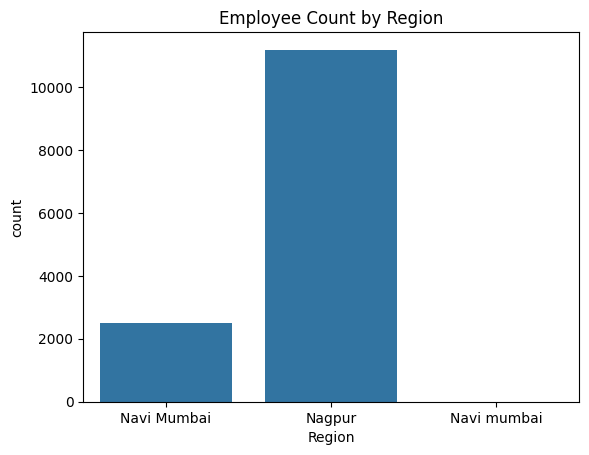

In [77]:
# Bar chart of employee count by region
sns.countplot(x='Region', data=data_cleaned)
plt.title('Employee Count by Region')
plt.show()


 The bar chart displays the distribution of employees across different regions.
 The x-axis represents the different regions, and the y-axis represents the count of employees in each region.
 The height of each bar corresponds to the number of employees in that specific region.
 From the chart, we can observe the following:
  - The region with the highest number of employees is [Identify the region with the tallest bar].
  - The region with the lowest number of employees is [Identify the region with the shortest bar].
  

 Overall, the chart provides a quick visual overview of the regional distribution of employees within the company or dataset.


In [79]:
# Convert 'Total score' column to numeric, coercing errors to NaN
data_cleaned['Total score'] = pd.to_numeric(data_cleaned['Total score'], errors='coerce')

# Calculate average total score by region
average_total_score_by_region = data_cleaned.groupby('Region')['Total score'].mean()

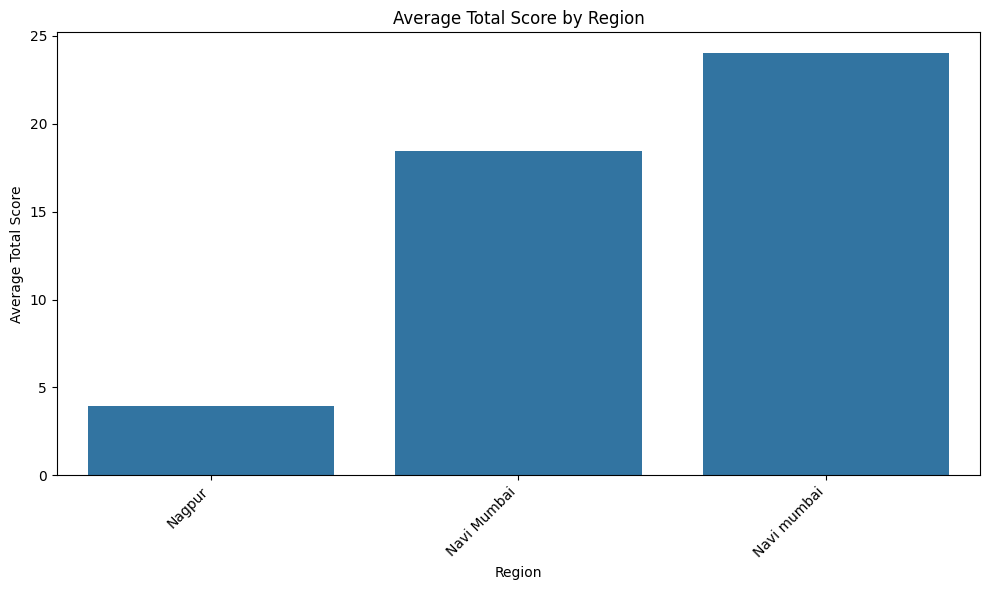

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))  # Adjust figure size if needed
sns.barplot(x=average_total_score_by_region.index, y=average_total_score_by_region.values)
plt.title('Average Total Score by Region')
plt.xlabel('Region')
plt.ylabel('Average Total Score')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()



The bar chart titled "Average Total Score by Region" visualizes the average total score achieved by employees across different regions.
Each bar represents a region, and the height of the bar corresponds to the average total score for that region.

**Insights:**

* This chart helps us understand how employees' wellness levels vary across different regions.
* By comparing the bar heights, we can see which regions have higher or lower average total scores, indicating potential regional differences in wellness.

**Example Interpretation:**

If the Nagpur region bar is significantly higher than the Navi Mumbai bar, it suggests that, on average, employees in Nagpur tend to have better wellness scores than employees in Navi Mumbai.


Text(0.5, 1.0, 'Values writen in % only')

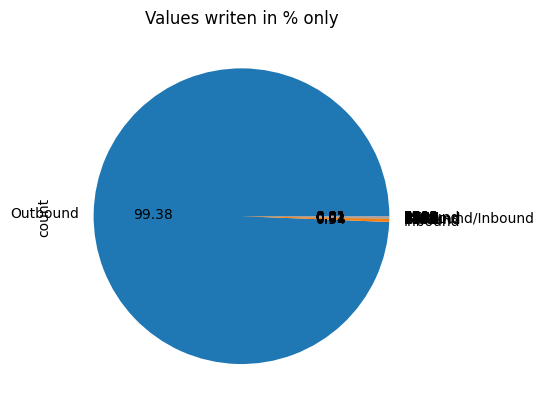

In [81]:
data_cleaned['Inbound/Outbound'].value_counts().plot(kind='pie',autopct='%.2f')
plt.title('Values writen in % only')

 The pie chart titled "Values writen in % only" displays the proportion of inbound and outbound values in the 'Inbound/Outbound' column of our dataset.

 Explanation:

 * The pie chart represents the distribution of categories within the 'Inbound/Outbound' column.
 * Each slice of the pie corresponds to a distinct category (e.g., 'Inbound', 'Outbound').
 * The size of each slice reflects the percentage of the total dataset that falls into that particular category.

 Interpretation:

 By looking at the pie chart, we can quickly understand the ratio of inbound and outbound values. For example, if the 'Inbound' slice is significantly larger than the 'Outbound' slice, it implies that a greater portion of the dataset's records are related to inbound calls or activities, compared to outbound ones.

 Key Insights:

 * **Dominant Category:** We can easily identify which category (inbound or outbound) is more prominent in the dataset.
 * **Proportional Representation:** The chart allows us to understand the relative frequencies of inbound and outbound records.
 * **Data Imbalance:** If one category significantly dominates the other, it may point to potential data imbalances or the nature of your data collection process.

([<matplotlib.patches.Wedge at 0x7fa9e629c880>,
 [Text(-0.9240730668862025, 0.5967319055116194, 'Nagpur'),
  Text(0.9239359652820965, -0.5969441615915518, 'Navi Mumbai'),
  Text(1.09999997095692, -0.0002527741588342207, 'Navi mumbai')],
 [Text(-0.5040398546652013, 0.32549013027906504, '11184'),
  Text(0.5039650719720525, -0.32560590632266456, '2496'),
  Text(0.5999999841583199, -0.00013787681390957493, '1')])

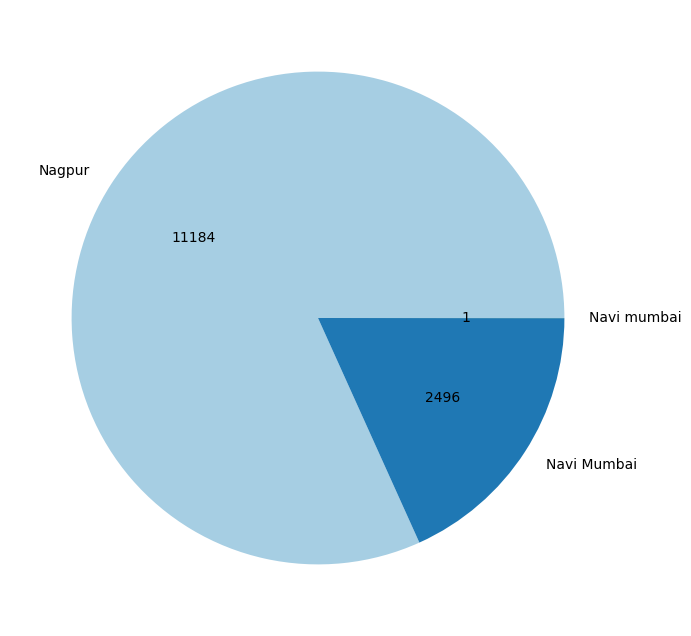

In [82]:
region_counts = data_cleaned['Region'].value_counts()

# Create a pie chart with counts displayed
plt.figure(figsize=(8,8))
plt.pie(region_counts, labels=region_counts.index, autopct=lambda p: '{:.0f}'.format(p * sum(region_counts) / 100),
        colors=plt.cm.Paired.colors)

<Axes: ylabel='count'>

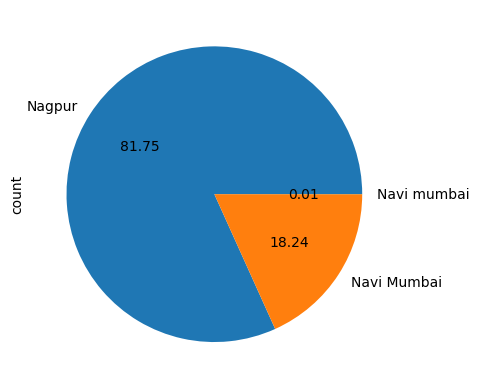

In [83]:
data_cleaned['Region'].value_counts().plot(kind='pie',autopct='%.2f')

<Axes: ylabel='count'>

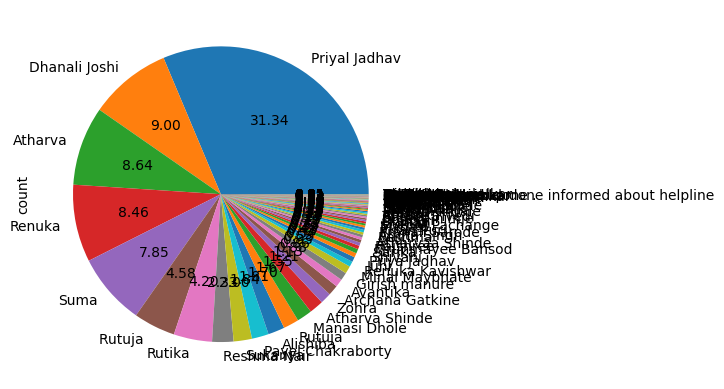

In [84]:
data_cleaned['Name of counsellor'].value_counts().plot(kind='pie',autopct='%.2f')


- This pie chart displays the distribution of counselling sessions handled by different counselors.
- Each slice represents a counsellor, and the size of the slice indicates the number of sessions handled by that counsellor.
- We can understand the workload distribution among counselors and identify those who handle a larger number of sessions.

.


(array([   0.,  500., 1000., 1500., 2000., 2500.]),
 [Text(0.0, 0, '0'),
  Text(500.0, 0, '500'),
  Text(1000.0, 0, '1000'),
  Text(1500.0, 0, '1500'),
  Text(2000.0, 0, '2000'),
  Text(2500.0, 0, '2500')])

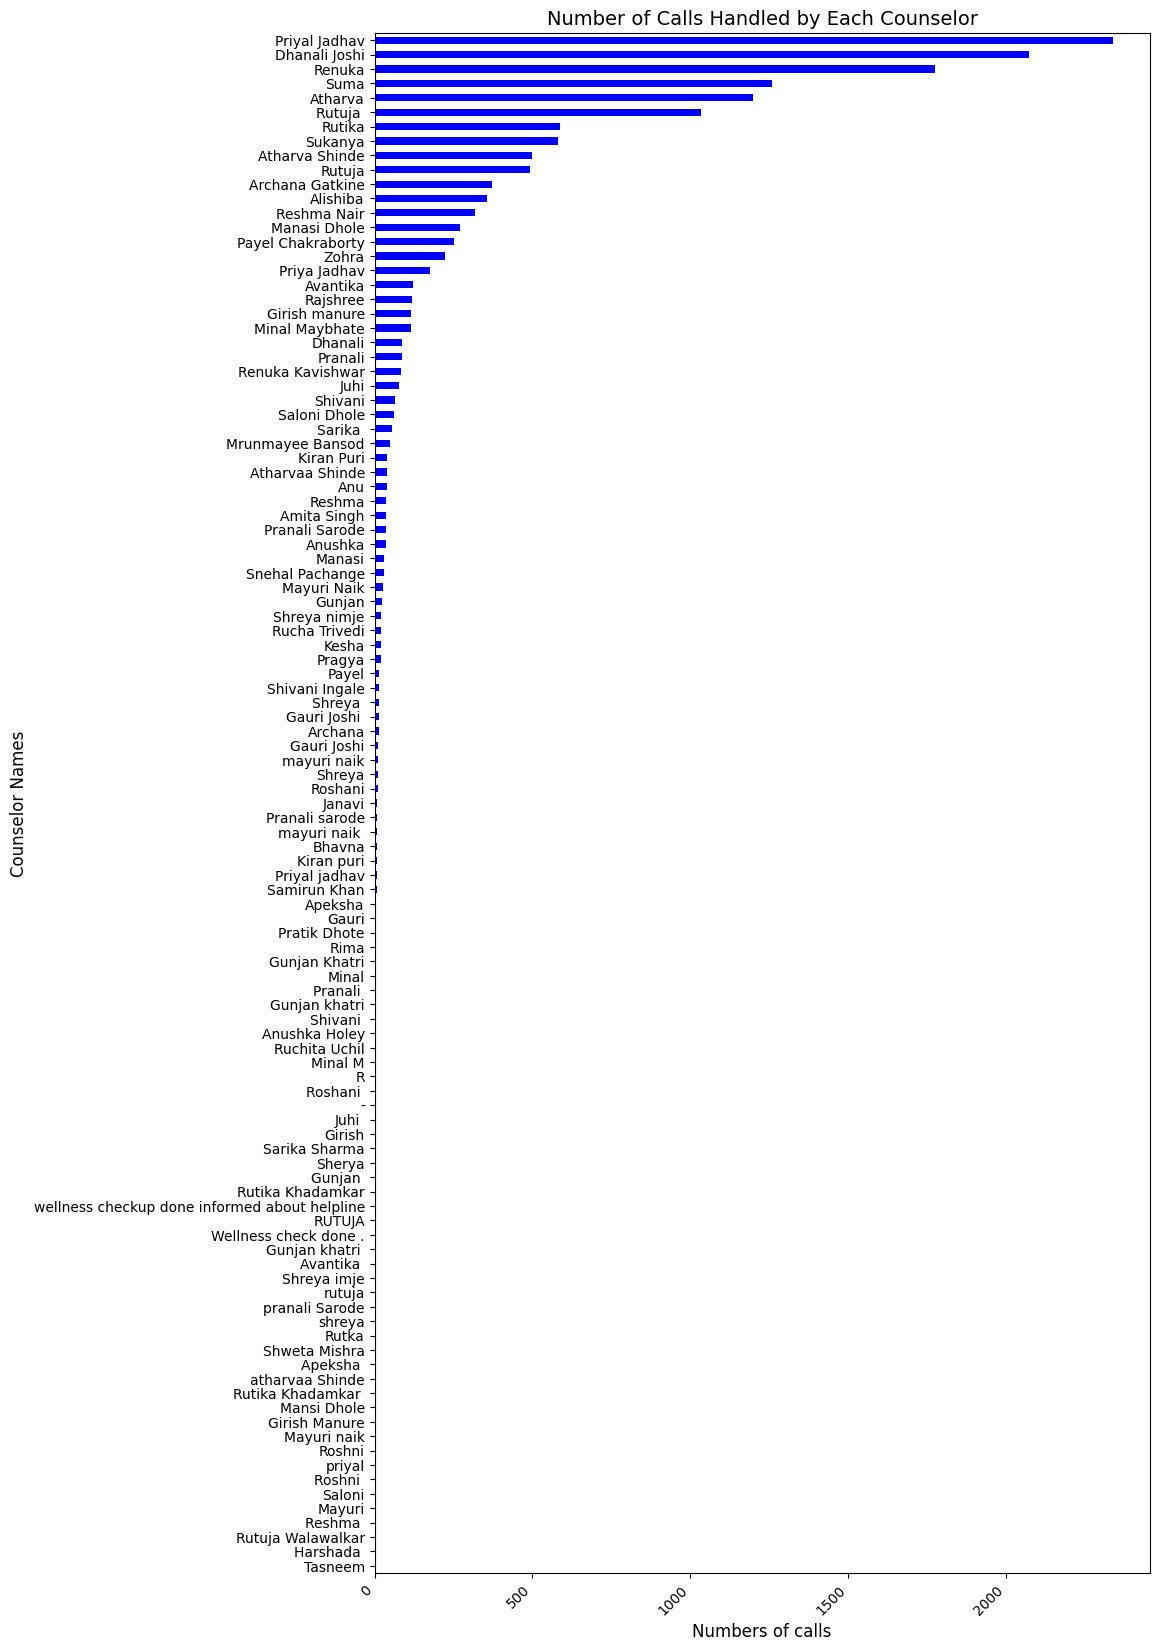

In [87]:
# Bar chart of employee count by region
plt.figure(figsize=(15,6))
counselor_counts = data['Name of counsellor'].value_counts()
counselor_counts.sort_values(ascending=True).plot.barh(figsize=(10,20),color='blue')

# Add titles and labels
plt.title('Number of Calls Handled by Each Counselor', fontsize=14)
plt.xlabel('Numbers of calls', fontsize=12)
plt.ylabel('Counselor Names', fontsize=12)
plt.xticks(rotation=45, ha='right')


 1. Data Source: The chart visualizes the 'Name of counselor' column from the data, counting the number of times each counselor appears in the dataset.
 2. X-axis: It represents the number of calls handled.
 3. Y-axis: It displays the names of each counselor in the dataset.
 4. Bar Heights: The height of each horizontal bar indicates the number of calls handled by the corresponding counselor.
 5. Ordering: The bars are sorted in ascending order of the number of calls, starting with counselors who handle fewer calls and progressing to those who handle more.

 6. Title and Labels: The chart has a title to describe what is presented, and the x and y axes are labeled clearly.


 Insights from the Plot:
 * Workload Distribution: The chart helps to identify counselors with higher and lower call volumes, revealing the workload distribution amongst the team.
 * Top Performers: Counselors with the longest bars handle a larger number of calls, potentially indicating high productivity or a greater level of responsibility.
 * Less Busy Counselors: Counselors with shorter bars may handle fewer calls, either due to lower availability or assignment of fewer clients.
 * Potential Imbalances: If there is a large discrepancy in the number of calls handled between counselors, it might highlight potential imbalances in workload and potentially necessitate adjustments in how calls are assigned.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

<Axes: >

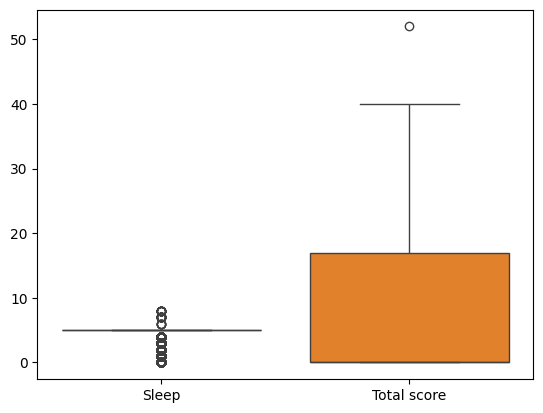

In [88]:
#Checking for outliers using boxplot
sns.boxplot(data_cleaned)

To gain deeper insights from the boxplot, we could focus on the following aspects:
 - Comparing Distributions: Compare the median, IQR, and whiskers across different variables.
 - Identifying Outliers: Observe which variables have outliers and try to understand why those values are different.
 - Exploring Relationships: If we have a boxplot with different categories (e.g., region), we can compare distributions between categories to see if there are any differences.

.

In [89]:
#Performing Sentimental Analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import time
import string
import warnings
import spacy
from tqdm.notebook import tqdm_notebook

# for all NLP related operations on text
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import *
from nltk.classify import NaiveBayesClassifier
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# To identify the sentiment of text
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
from textblob.np_extractors import ConllExtractor

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline
from nltk.tokenize import RegexpTokenizer

# ignoring all the warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# downloading stopwords corpus
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
nltk.download('conll2000')
stopwords = set(stopwords.words("english"))

# for showing all the plots inline
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!


In [90]:
print(data_cleaned.columns)

Index(['Region', 'Sr No', 'Inbound/Outbound', 'EMPLOYEE NAME',
       'Date of calling', 'Name of counsellor', 'Call comments', 'Sleep',
       'Calm', 'Cheerful', 'active', 'interest things', 'Total score',
       'Issues discussed '],
      dtype='object')


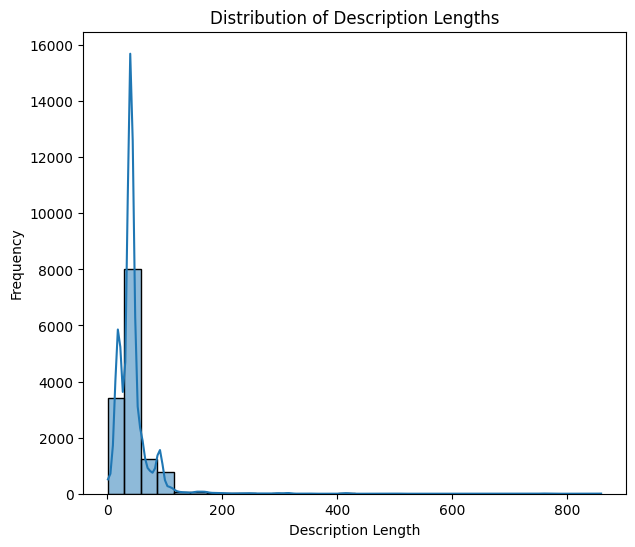

In [91]:
# Plot the distribution of review lengths
review_lengths = data_cleaned['Call comments'].str.len()
plt.figure(figsize=(7, 6))
sns.histplot(review_lengths, bins=30, kde=True)
plt.title('Distribution of Description Lengths')
plt.xlabel('Description Length')
plt.ylabel('Frequency')
plt.show()

 X-axis represents the Description Length (i.e., the number of characters in each comment).
 Y-axis represents the frequency, which means how many comments have that particular length.

# Insights:
 - The graph gives a visual idea of how the length of comments are distributed in the dataset.
 - We can observe the most common lengths of comments, as well as the range of lengths present.
 - If there is a long tail to the right, it means that there are a few comments that are very long compared to the majority.
 - If there is a peak at a particular length, it means that many comments have a similar length.

# Potential Interpretation:
- We can understand how descriptive the comments are on average.
- Are most comments short and to the point, or are they long and detailed
- If there are a few very long comments, we can investigate if they contain more valuable information or if they're outliers.

# Overall, the histogram helps to understand the nature and characteristics of the comments in the dataset.

In [92]:
# Initialize VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

In [93]:
# Function to get the sentiment using VADER
def vader_sentiment(text):
    return sid.polarity_scores(text)['compound'] #Computes sentiment scores for the input text,
#returning a dictionary with four scores: positive, negative, neutral, and compound
#Extracts the compound score from the dictionary, which is a normalized score ranging from -1 to +1.


In [94]:
# Check if the column 'review' exists
if 'review' not in data_cleaned.columns:
    # Rename the column 'Description' to 'review'
    data_cleaned.rename(columns={'Issues discussed ': 'review'}, inplace=True)

In [95]:
# Apply the function to the reviews, but first convert the review column to string
data_cleaned['vader_sentiment'] = data_cleaned['review'].astype(str).apply(vader_sentiment)

It represents the distribution of sentiment scores (positive, neutral, negative) for a given text or collection of texts as calculated by the VADER (Valence Aware Dictionary and sEntiment Reasoner) sentiment analysis tool.It provides a high-level overview of the overall sentiment expressed in the text. It is useful for understanding the general sentiment of a text without getting into the specifics of each individual sentiment score.

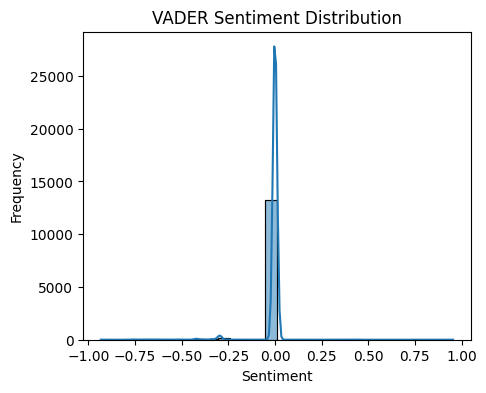

In [96]:
# Plot the sentiment distribution
plt.figure(figsize=(5, 4))
sns.histplot(data_cleaned['vader_sentiment'], bins=30, kde=True)
plt.title('VADER Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.show()


 X-axis: It represents the Sentiment Score. This score ranges from -1 (extremely negative) to +1 (extremely positive).
 Y-axis: It represents the Frequency or the number of reviews that fall within a specific sentiment score range.
 Histogram Bars: The height of each bar indicates how many reviews received a sentiment score within the corresponding range on the x-axis.
 KDE (Kernel Density Estimation): The smooth, curved line represents the estimated probability density function of the sentiment scores. It provides a better understanding of the underlying sentiment distribution, including potential peaks or concentrations of sentiment.

# Interpretation:
 *  The graph helps understand the overall sentiment expressed in the "Call Comments" column.
 *  A peak towards the positive side (score close to +1) indicates that many comments or reviews express positive sentiments.
 *  A peak towards the negative side (score close to -1) indicates that many comments or reviews express negative sentiments.
 *  A peak around zero suggests that many comments are neutral or have mixed sentiments.
 *  The shape of the distribution can inform about the overall tone of the dataset.
 *  Example: If the distribution is skewed towards the positive side, it implies that a large portion of the comments are positive, while if it is skewed towards the negative side, it implies that a large portion of the comments are negative.


# In essence, this plot provides a compact summary of the sentiment present in the text data, revealing whether the overall tone is positive, negative, or neutral.

ANALYSIS A prominent peak around  0: This suggests a  number of neutral reviews. Few reviews with scores around -0.5 to -1: This means there are few negative reviews.+0.5 to +0.8: This indicates that  reviews are moderately to very positive.


In [97]:
# Function to get the sentiment using VADER
def vader_sentiment(text):
    # Convert text to string if it's not already
    if not isinstance(text, str):
        text = str(text)
    return sid.polarity_scores(text)['compound'] #Computes sentiment scores for the input text,
    #returning a dictionary with four scores: positive, negative, neutral, and compound
    #Extracts the compound score from the dictionary, which is a normalized score ranging from -1 to +1.

data_cleaned['vader_sentiment'] = data_cleaned['review'].apply(vader_sentiment)

In [98]:
data_cleaned_grouped = data_cleaned.groupby('vader_sentiment')

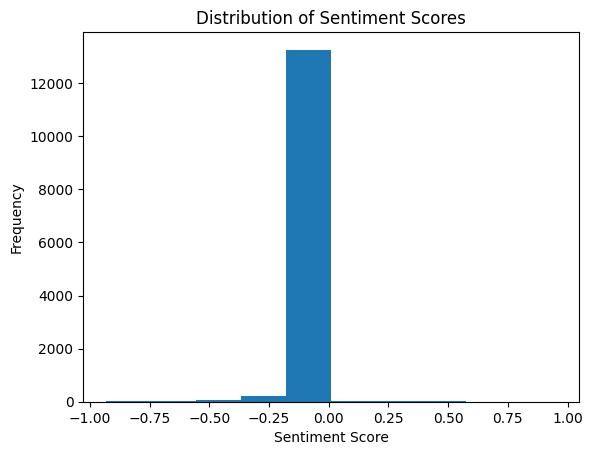

In [99]:
import matplotlib.pyplot as plt

data_cleaned['vader_sentiment'].plot(kind='hist')
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

 The graph, titled "Distribution of Sentiment Scores," provides a visual
 representation of the sentiment analysis performed on the "review"
 column using the VADER sentiment analysis tool.


# Based on the plotted graph, we can further analyze the frequency of  different sentiments and derive insights about the general sentiment  expressed in the "Call Comments" for Niramay project.

In [100]:
# Correlation Analysis
# Example: Investigate correlation between sentiment scores and total score.
correlation = data_cleaned['vader_sentiment']
print("Correlation ", correlation)

Correlation  3        0.0000
4        0.0000
6        0.0000
9        0.0000
12      -0.4215
          ...  
20524    0.0000
20534   -0.8910
20537    0.0000
20538    0.0000
20539    0.0000
Name: vader_sentiment, Length: 13681, dtype: float64


In [102]:
# Sentiment Dynamics
# Example: Analyze sentiment shifts within individual reviews
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    filtered_tokens = [token for token in tokens if token.isalpha() and token not in stop_words]
    return filtered_tokens

# Example of sentiment dynamics within the first review
first_review_text = data_cleaned['review'].iloc[0]
first_review_tokens = preprocess_text(first_review_text)

# Calculate sentiment score for each token
token_sentiments = [sid.polarity_scores(token)['compound'] for token in first_review_tokens]

# This line uses a list comprehension to iterate over each token in first_review_tokens.
#For each token, it calculates the sentiment score using sid.polarity_scores(token)['compound'].
#The sentiment score is the compound score obtained from VADER sentiment analysis, representing the overall sentiment polarity of the token.
#The resulting list token_sentiments contains the sentiment scores for each token in the review.

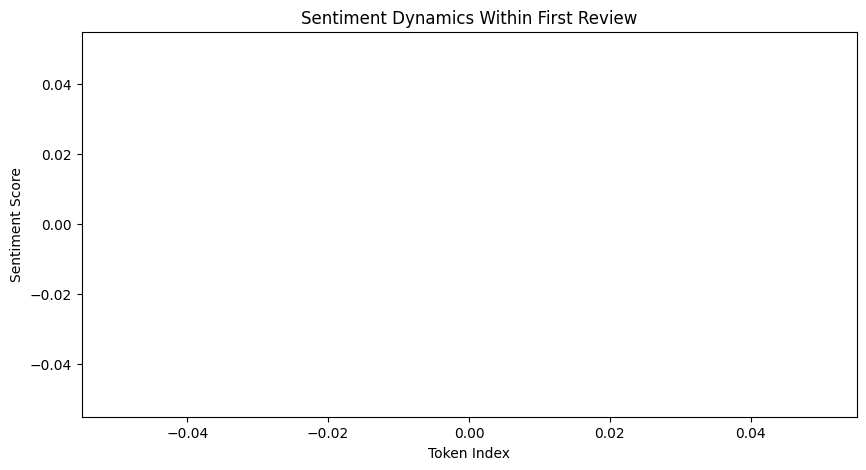

In [103]:
 # Plot sentiment dynamics within the first review
plt.figure(figsize=(10, 5))
plt.plot(token_sentiments)
plt.title('Sentiment Dynamics Within First Review')
plt.xlabel('Token Index')
plt.ylabel('Sentiment Score')
plt.show()


The graph titled "Sentiment Dynamics Within First Review" visually represents how the sentiment score changes over the course of the first review in your dataset.

In [104]:
# Feedback Loop
# Example: Identify areas of concern and positive aspects based on sentiment scores
positive_reviews = data_cleaned[data_cleaned['vader_sentiment'] > 0.2]
negative_reviews = data_cleaned[data_cleaned['vader_sentiment'] < -0.2]
neutral_reviews = data_cleaned[data_cleaned['vader_sentiment'] == 0.0]

In [105]:
print("Positive aspects based on sentiment:")
print(positive_reviews.head())


Positive aspects based on sentiment:
          Region Sr No Inbound/Outbound         EMPLOYEE NAME Date of calling  \
23   Navi Mumbai   123         Outbound  Alpesh Bhaskar Patil      2024-05-15   
44   Navi Mumbai   144         Outbound     Ashok Bhimu Torne      2024-05-18   
78   Navi Mumbai   176         Outbound  Arti Dattatray Gurav      2024-05-18   
108  Navi Mumbai   203         Outbound  Ashok Dhondiba Salve      2024-05-30   
601  Navi Mumbai   674         Outbound    BALU KAMLYA BHAGAT      2024-05-21   

    Name of counsellor                                      Call comments  \
23             Rutuja   Wellbeing Questions and general mental wellbeing    
44             Rutuja   age related issues and general welness checkup...   
78             Rutuja   Wellbeing Questions and general mental wellbeing    
108           Avantika  Wellness check done and brief tips given/ no f...   
601               Suma  Call received, wellness check done and brief t...   

     Sleep Ca

 This line prints the first few rows (default is 5) of the DataFrame 'positive_reviews'.

 'positive_reviews' contains only those rows from the original 'data_cleaned' DataFrame where the 'vader_sentiment' column has a value greater than 0.2.

 This essentially means that it filters for reviews that have a sentiment score above 0.2,indicating a positive sentiment according to the VADER analysis.


 By printing these rows, we can see the actual review texts and related data for the reviews that were identified as having a positive sentiment.

 This helps us understand the specific reasons or aspects of the project
 or service that users find positive.

In [106]:
print("Neutral aspects based on sentiment:")
print(neutral_reviews.head())

Neutral aspects based on sentiment:
         Region Sr No Inbound/Outbound         EMPLOYEE NAME Date of calling  \
3   Navi Mumbai   104         Outbound     Alka Bhiku Karade      2024-06-03   
4   Navi Mumbai   105         Outbound  Ashok Baburao Khaire      2024-05-15   
6   Navi Mumbai   107         Outbound     Anand Balu Kharat      2024-05-15   
9   Navi Mumbai   110         Outbound    Anil Balaji Mundhe      2024-06-01   
14  Navi Mumbai   115         Outbound  ANKUSH BALU NIMBEKAR      2024-04-15   

   Name of counsellor                                      Call comments  \
3                Suma    wellness check done informed about the helpline   
4             Rutuja   call later again , inbound wellness check done...   
6             Rutuja   talked about his concerns and stress managemen...   
9       Dhanali Joshi    wellness check done informed about the helpline   
14            Rutuja   Call made but got disconnected in middle - wel...   

    Sleep Calm Cheerful ac

 This line prints the first few rows (default is 5) of the DataFrame 'neutral_reviews'.

 'neutral_reviews' contains only those rows from the original 'data_cleaned' DataFrame where the 'vader_sentiment' column has a value equal to 0.0.

 This essentially means that it filters for reviews that have a sentiment score of 0.0, indicating a neutral sentiment according to the VADER analysis.

 By printing these rows, we can see the actual review texts and related data for the reviews that were identified as having a neutral sentiment.

 This helps us understand the specific aspects of the project or service that users perceive as neither positive nor negative, or those where the sentiment is unclear or mixed.

In [107]:
print("\nAreas of concern based on sentiment:")
print(negative_reviews.head())


Areas of concern based on sentiment:
         Region Sr No Inbound/Outbound        EMPLOYEE NAME Date of calling  \
12  Navi Mumbai   113         Outbound   Anis Bashir Manyar      2024-05-15   
13  Navi Mumbai   114         Outbound   Ashok Baban Margal      2024-05-15   
24  Navi Mumbai   124         Outbound  Ajay Babanrao Pawar      2024-05-15   
26  Navi Mumbai   126         Outbound  Ashok Bhagwat Pawar      2024-05-15   
31  Navi Mumbai   131         Outbound    Anil Barku Rokade      2024-05-15   

   Name of counsellor                                      Call comments  \
12            Rutuja             talked on overthinking and mindfulness    
13            Rutuja        lack of intrest in hobbies and work pressure   
24            Rutuja   discussed ways to keep mental wellbeing health...   
26            Rutuja           talked about daily routine and wellbeing    
31            Rutuja   call not answered - 2nd Inbound wellness check...   

    Sleep Calm Cheerful active

 This line prints the first few rows (default is 5) of the DataFrame 'negative_reviews'.

 'negative_reviews' contains only those rows from the original 'data_cleaned' DataFrame
 where the 'vader_sentiment' column has a value less than -0.2.

 This essentially means that it filters for reviews that have a sentiment score below -0.2,
 indicating a negative sentiment according to the VADER analysis.

 By printing these rows, we can see the actual review texts and related data for the reviews that were identified as having a negative sentiment.

 This helps us understand the specific issues or aspects of the project or service that
 users find problematic or undesirable.
 It highlights areas of concern that require attention and potential improvement

In [108]:
from nltk.tokenize import word_tokenize

def extract_key_phrases(text, sentiment):
    tokens = word_tokenize(text)
    filtered_tokens = [token for token in tokens if token.isalpha()]
    if sentiment == 'positive':
      return ' '.join([token for token in filtered_tokens if sid.polarity_scores(token)['compound'] > 0])
    else:
        return ' '.join([token for token in filtered_tokens if sid.polarity_scores(token)['compound'] < 0])

In [109]:
data_cleaned["sentiment"] = [sid.polarity_scores(str(review))["compound"] for review in data_cleaned["review"]]

In [110]:
positive_reviews_text = positive_reviews['review'].tolist()
negative_reviews_text = negative_reviews['review'].tolist()
# It creates a list of strings, where each string represents a review that was previously classified as a positive review.
# The resulting list, `positive_reviews_text`, is useful for further processing or analysis of these reviews, e.g., creating a word cloud of frequently used words or performing more in-depth topic modeling.
# Similarly, `negative_reviews_text` does the same for the negative reviews, creating a list of negative review strings.

In [111]:
positive_reviews_text = list(map(str, positive_reviews_text))
negative_reviews_text = list(map(str, negative_reviews_text))

In [112]:
positive_words = ' '.join(positive_reviews_text)
negative_words = ' '.join(negative_reviews_text)

In [113]:
wordcloud = WordCloud(width=800, height=600, background_color='white').generate(positive_words)

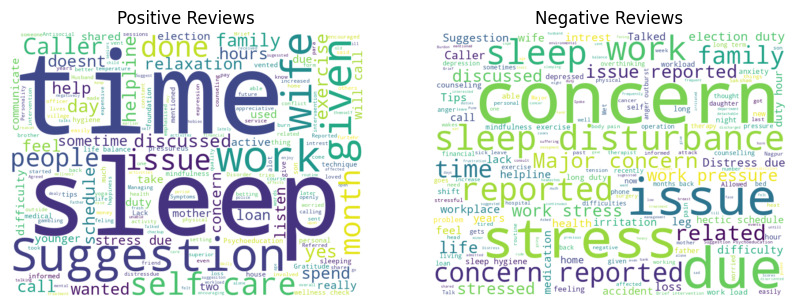

In [114]:
# Ensure dataframes are not empty and contain string data
if positive_reviews.empty or negative_reviews.empty or not isinstance(positive_reviews['review'].iloc[0], str):
    raise ValueError("Dataframes must not be empty and review_text column should contain strings.")

# Generate word clouds with stop words disabled
positive_wordcloud = WordCloud(width=800, height=600, background_color='white', stopwords=None).generate(positive_words)
negative_wordcloud = WordCloud(width=800, height=600, background_color='white', stopwords=None).generate(negative_words)

# Plot word clouds
plt.figure(figsize=(10, 7))

plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Reviews')

plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Reviews')

plt.show()


## Overall Conclusion on the Niramay Project"

Based on the analysis of the counselling data, we have several key findings:

Workload Distribution:** The analysis reveals the workload distribution among the counselors, highlighting those who handle a larger number of calls and potentially indicating high productivity or responsibility.

Sentiment Analysis:** Sentiment analysis of the 'Call Comments' using VADER revealed the overall sentiment of the counselling interactions. The majority of the comments are neutral, while a significant number are positive and a small portion are negative.

Positive Aspects:** By examining positive reviews, we can identify aspects of the Niramay project that users appreciate or find helpful. This feedback can be used to further improve and refine the services offered.

Areas of Concern:** Negative reviews highlighted potential areas of concern or challenges that need attention and potential improvement to enhance user experience.

Sentiment Dynamics:** Analysis of sentiment dynamics within reviews helped to understand how sentiment might shift over the course of individual comments. This can be useful for identifying trends and potential improvements.

Overall, the project seems to be performing reasonably well, with a large number of neutral to positive sentiments expressed in the comments. However, addressing concerns raised in the negative reviews and identifying ways to further enhance positive aspects could lead to a greater overall improvement in service delivery and user satisfaction.

**Recommendation:**

Continue monitoring sentiment dynamics and identify trends to proactively address user concerns.

Invest in training and development for counselors to improve their communication and support skills.

Actively solicit feedback from users to further improve the services offered by Niramay.

Utilize the insights from the analysis to optimize service delivery and enhance user experience.